In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar el archivo de barreras a la formacion para empresas de servicios que SI dieron formación
full_path = r"C:\it_academy\ProjecteData - Materiales\Sprint04\dfs_barreras\df_barreras_sector_DanFormacion.csv"
try:
    formacion_barreras = pd.read_csv(full_path)
    print(f"Se cargó correctamente: {full_path}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo: {full_path}.")
except Exception as e:
    print(f"Ocurrió un error al cargar {full_path}: {e}")

Se cargó correctamente: C:\it_academy\ProjecteData - Materiales\Sprint04\dfs_barreras\df_barreras_sector_DanFormacion.csv


In [3]:
formacion_barreras.isnull().sum()

anio          0
motivo        0
nada          0
poco          0
bastante      0
mucho         0
total%        0
total_cias    0
formacion     0
dtype: int64

In [4]:
print(formacion_barreras.info())
print(round(formacion_barreras.describe()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anio        42 non-null     int64  
 1   motivo      42 non-null     object 
 2   nada        42 non-null     float64
 3   poco        42 non-null     float64
 4   bastante    42 non-null     float64
 5   mucho       42 non-null     float64
 6   total%      42 non-null     float64
 7   total_cias  42 non-null     int64  
 8   formacion   42 non-null     bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 2.8+ KB
None
         anio  nada  poco  bastante  mucho  total%  total_cias
count    42.0  42.0  42.0      42.0   42.0    42.0        42.0
mean   2021.0  25.0  35.0      30.0   10.0   100.0    159681.0
std       1.0  12.0  11.0      12.0    6.0     0.0     17456.0
min    2019.0   7.0  14.0       9.0    2.0   100.0    129840.0
25%    2020.0  18.0  28.0      22.0    4.0   100.0    14

In [5]:
# --- ANÁLISIS DE BARRERAS MÁS IMPORTANTES ---

# Crear una columna que combine "bastante" + "mucho" para cada motivo
formacion_barreras['alta_importancia'] = formacion_barreras['bastante'] + formacion_barreras['mucho']

# Ver una muestra de los datos para entender mejor los motivos
print("=== MUESTRA DE DATOS EMPRESAS DEL SECTOR SERVICIOS QUE DIERON FORMACION ===")
print(formacion_barreras[['anio', 'motivo', 'bastante', 'mucho', 'alta_importancia']].head(10))

=== MUESTRA DE DATOS EMPRESAS DEL SECTOR SERVICIOS QUE DIERON FORMACION ===
   anio                                             motivo  bastante  mucho  \
0  2019  El nivel de formación de los empleados era el ...      45.0   13.3   
1  2019  La estrategia preferida de la empresa fue cont...      35.8   10.6   
2  2019  Dificultad para evaluar la necesidades de form...      13.0    1.6   
3  2019  La falta de cursos de formación adecuados en e...      22.1    6.2   
4  2019           El alto coste de los cursos de formación      32.6   13.1   
5  2019  El mayor esfuerzo realizado en años anteriores...      21.1    3.3   
6  2019  La elevada carga de trabajo y el escaso tiempo...      42.0   21.0   
7  2019  Dificultad para acceder a ayudas o subvencione...      29.0   15.2   
8  2020  El nivel de formación de los empleados era el ...      45.0   13.3   
9  2020  La estrategia preferida de la empresa fue cont...      35.8   10.6   

   alta_importancia  
0              58.3  
1         

In [6]:
# Análisis por motivo (promedio de todos los años)
print("\n=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) PARA EMPRESAS DE SERVICIOS QUE DIERON FORMACION ===")
barreras_f = formacion_barreras.groupby('motivo').agg({
    'bastante': 'mean',
    'mucho': 'mean', 
    'alta_importancia': 'mean',
    'total_cias': 'mean'
}).round(1)

# Ordenar por alta importancia descendente
barreras_ordenadas_f = barreras_f.sort_values('alta_importancia', ascending=False)
print(barreras_ordenadas_f)


=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) PARA EMPRESAS DE SERVICIOS QUE DIERON FORMACION ===
                                                    bastante  mucho  \
motivo                                                                
El nivel de formación de los empleados era el a...      49.8   17.0   
La empresa prefirió contratar a personal con la...      42.3   19.2   
La elevada carga de trabajo y el escaso tiempo ...      40.2   16.4   
La estrategia preferida de la empresa fue contr...      37.9   11.2   
El alto coste de los cursos de formación                31.5   11.9   
Dificultad para acceder a ayudas o subvenciones...      28.7   13.5   
La falta de cursos de formación adecuados en el...      22.7    6.6   
El mayor esfuerzo realizado en años anteriores ...      22.6    3.3   
Dificultad para evaluar la necesidades de forma...      15.3    2.2   
La empresa prefirió tener personal con contrato...       9.1    2.1   
Otras razones                         

In [7]:
#Top 5 barreras más importantes - Empresas de Servicios que SI dieron formación
print("\n=== TOP 5 BARRERAS MÁS IMPORTANTES \nEMPRESAS DE SERVICIOS QUE DIERON FORMACION ===")
top_5 = barreras_ordenadas_f.head(5)
for i, (motivo, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. {motivo}")
    print(f"   - Alta importancia: {row['alta_importancia']:.1f}% (Bastante: {row['bastante']:.1f}% + Mucho: {row['mucho']:.1f}%)")
    print(f"   - Empresas promedio: {row['total_cias']:.0f}")
    print()


=== TOP 5 BARRERAS MÁS IMPORTANTES 
EMPRESAS DE SERVICIOS QUE DIERON FORMACION ===
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
   - Alta importancia: 66.8% (Bastante: 49.8% + Mucho: 17.0%)
   - Empresas promedio: 158860

2. La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias 
   - Alta importancia: 61.5% (Bastante: 42.3% + Mucho: 19.2%)
   - Empresas promedio: 176089

3. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
   - Alta importancia: 56.6% (Bastante: 40.2% + Mucho: 16.4%)
   - Empresas promedio: 158860

4. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
   - Alta importancia: 49.0% (Bastante: 37.9% + Mucho: 11.2%)
   - Empresas promedio: 154553

5. El alto coste de los cursos de formación
   - Alta importancia: 43.4% (Bastante: 31.5% + Mucho: 11.9%)
   - Empresas prome

In [8]:
# 5. Evolución temporal de las top 5 barreras
print("=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS \nEMPRESAS DE SERVICIOS QUE DIERON FORMACION===")
top_5_motivos = barreras_ordenadas_f.head(5).index.tolist()

for motivo in top_5_motivos:
    print(f"\n--- {motivo} ---")
    evolucion = formacion_barreras[formacion_barreras['motivo'] == motivo][['anio', 'bastante', 'mucho', 'alta_importancia']]
    print(evolucion.to_string(index=False))

=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS 
EMPRESAS DE SERVICIOS QUE DIERON FORMACION===

--- El nivel de formación de los empleados era el apropiado para las necesidades de la empresa ---
 anio  bastante  mucho  alta_importancia
 2019      45.0   13.3              58.3
 2020      45.0   13.3              58.3
 2021      52.9   17.1              70.0
 2022      58.9   15.9              74.8
 2023      47.2   25.6              72.8

--- La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias  ---
 anio  bastante  mucho  alta_importancia
 2023      42.3   19.2              61.5

--- La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa ---
 anio  bastante  mucho  alta_importancia
 2019      42.0   21.0              63.0
 2020      42.0   21.0              63.0
 2021      39.4   13.6              53.0
 2022      41.5   14.6              56.1
 2023      36.3   11.6              47.9

--- La estrategia prefer

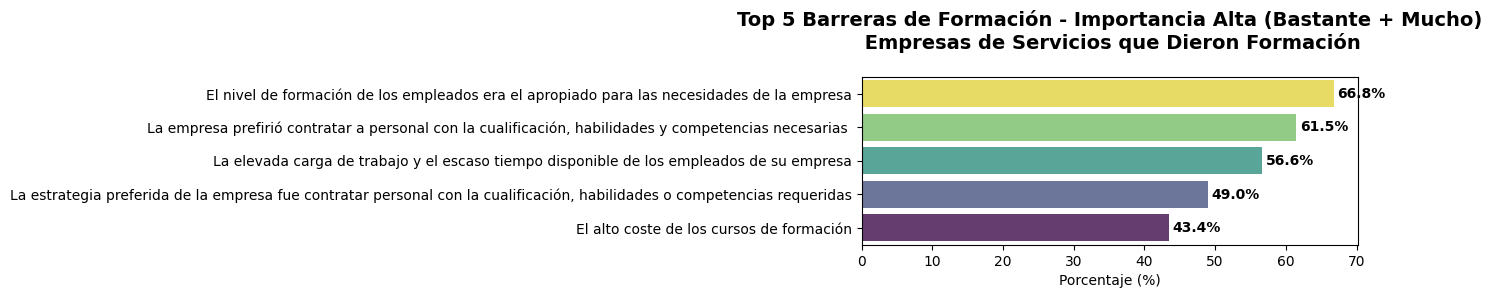

In [9]:
#Gráfico 1: Top 5 barreras
plt.subplot(2, 1, 1)
top_5 = barreras_ordenadas_f.head(5).reset_index()
sns.barplot(data=top_5, y='motivo', x='alta_importancia', hue='alta_importancia',legend=False, palette='viridis', alpha=0.8)
plt.title('Top 5 Barreras de Formación - Importancia Alta (Bastante + Mucho)\n Empresas de Servicios que Dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Porcentaje (%)')
plt.ylabel('')

# Agregar valores al final de cada barra
for i, v in enumerate(top_5['alta_importancia']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

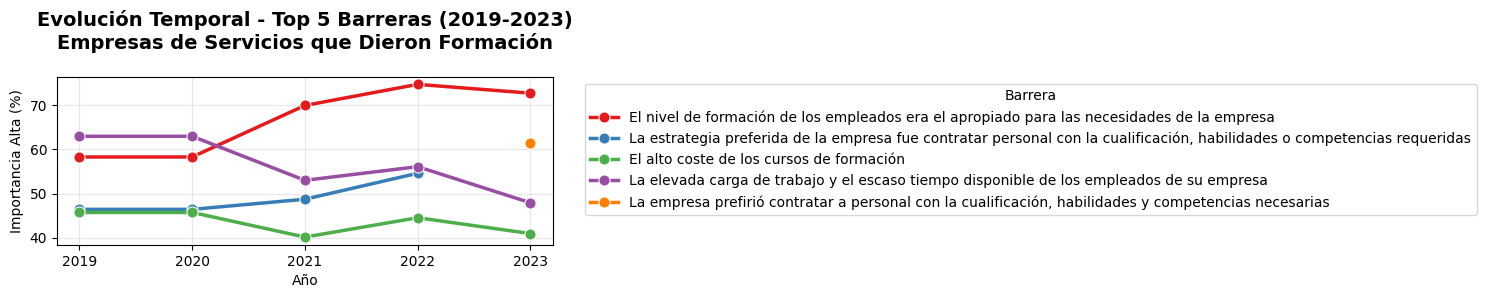

In [10]:
# Gráfico 2: Evolución temporal de top 5
plt.subplot(2, 1, 2)
# Dataframe para seaborn
top_5_data = formacion_barreras[formacion_barreras['motivo'].isin(top_5_motivos[:5])]
sns.lineplot(data=top_5_data, x='anio', y='alta_importancia', hue='motivo', 
             marker='o', linewidth=2.5, markersize=8, palette='Set1')
plt.title('Evolución Temporal - Top 5 Barreras (2019-2023)\nEmpresas de Servicios que Dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Año')
plt.ylabel('Importancia Alta (%)')
plt.legend(title='Barrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(top_5_data['anio'].unique())
plt.show()

In [12]:
# Cargar el archivo de barreras a la formacion para empresas de servicios que NO dieron formación
full_path2 = r"C:\it_academy\ProjecteData - Materiales\Sprint04\dfs_barreras\df_barreras_sector_NoDanFormacion.csv"

try: 
    noformacion_barreras = pd.read_csv(full_path2) # Ahora usa la ruta completa
    print(f"Se cargó correctamente: {full_path2}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo: {full_path2}.")
except Exception as e:
    print(f"Ocurrió un error al cargar {full_path2}: {e}")

Se cargó correctamente: C:\it_academy\ProjecteData - Materiales\Sprint04\dfs_barreras\df_barreras_sector_NoDanFormacion.csv


In [13]:
noformacion_barreras.isnull().sum()

anio          0
motivo        0
nada          0
poco          0
bastante      0
mucho         0
total%        0
total_cias    0
formacion     0
dtype: int64

In [14]:
noformacion_barreras.info()
round(noformacion_barreras.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anio        49 non-null     int64  
 1   motivo      49 non-null     object 
 2   nada        49 non-null     float64
 3   poco        49 non-null     float64
 4   bastante    49 non-null     float64
 5   mucho       49 non-null     float64
 6   total%      49 non-null     float64
 7   total_cias  49 non-null     int64  
 8   formacion   49 non-null     bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 3.2+ KB


,anio,nada,poco,bastante,mucho,total%,total_cias
count,49.0,49.0,49.0,49.0,49.0,49.0,49.0
mean,2021.0,33.0,31.0,25.0,11.0,100.0,74355.0
std,1.0,15.0,10.0,12.0,8.0,0.0,9723.0
min,2019.0,8.0,8.0,7.0,3.0,100.0,57303.0
25%,2020.0,25.0,23.0,19.0,6.0,100.0,72803.0
50%,2021.0,29.0,32.0,23.0,9.0,100.0,73213.0
75%,2022.0,41.0,38.0,32.0,17.0,100.0,77847.0
max,2023.0,69.0,50.0,52.0,33.0,100.0,90310.0


In [ ]:
# --- ANÁLISIS DE BARRERAS MÁS IMPORTANTES -  EMPRESAS DE SERVICIOS QUE NO DIERON FORMACION ---

# Crear una columna que combine "bastante" + "mucho" para cada motivo
noformacion_barreras['alta_importancia'] = noformacion_barreras['bastante'] + noformacion_barreras['mucho']

# Ver una muestra de los datos para entender mejor los motivos
print("=== MUESTRA DE DATOS EMPRESAS DEL SECTOR SERVICIOS QUE NO DIERON FORMACION ===")
print(noformacion_barreras[['anio', 'motivo', 'bastante', 'mucho', 'alta_importancia']].head(10))

=== MUESTRA DE DATOS EMPRESAS DEL SECTOR SERVICIOS QUE NO DIERON FORMACION ===
   anio                                             motivo  bastante  mucho  \
0  2019  El nivel de formación de los empleados era el ...      40.1   32.2   
1  2019  La estrategia preferida de la empresa fue cont...      43.1   20.2   
2  2019  Dificultad para evaluar la necesidades de form...      13.2    3.3   
3  2019  La falta de cursos de formación adecuados en e...      17.6    6.9   
4  2019           El alto coste de los cursos de formación      22.6    8.6   
5  2019  El mayor esfuerzo realizado en años anteriores...      17.7    4.1   
6  2019  La elevada carga de trabajo y el escaso tiempo...      30.3   18.1   
7  2019  Dificultad para acceder a ayudas o subvencione...      19.0   14.9   
8  2020  El nivel de formación de los empleados era el ...      47.9   32.9   
9  2020  La estrategia preferida de la empresa fue cont...      34.6   17.6   

   alta_importancia  
0              72.3  
1      

In [16]:
# Análisis por motivo (promedio de todos los años)
print("\n=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) \n EMPRESAS DE SERVICIOS QUE NO DIERON FORMACION ===")
barreras_por_motivo_nf = noformacion_barreras.groupby('motivo').agg({
    'bastante': 'mean',
    'mucho': 'mean', 
    'alta_importancia': 'mean',
    'total_cias': 'mean'
}).round(1)

# Ordenar por alta importancia descendente
barreras_ordenadas_nf = barreras_por_motivo_nf.sort_values('alta_importancia', ascending=False)
print(barreras_ordenadas_nf)


=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) 
 EMPRESAS DE SERVICIOS QUE NO DIERON FORMACION ===
                                                    bastante  mucho  \
motivo                                                                
El nivel de formación de los empleados era el a...      47.4   28.3   
La estrategia preferida de la empresa fue contr...      41.2   19.1   
La elevada carga de trabajo y el escaso tiempo ...      31.2   15.2   
Dificultad para acceder a ayudas o subvenciones...      23.6   10.9   
El alto coste de los cursos de formación                23.8    9.5   
La falta de cursos de formación adecuados en el...      20.0    7.9   
El mayor esfuerzo realizado en años anteriores ...      20.5    4.7   
Dificultad para evaluar la necesidades de forma...      16.8    3.8   
Cancelación o aplazamiento de las actividades d...      11.3    6.5   
Otras razones                                            8.7    5.6   
La empresa prefirió tener personal con

In [17]:
# Top 5 barreras más importantes
print("\n=== TOP 5 BARRERAS MÁS IMPORTANTES \n EMPRESAS DE SERVICIOS QUE NO DIERON FORMACION ===")
top_5_nf = barreras_ordenadas_nf.head(5)
for i, (motivo, row) in enumerate(top_5_nf.iterrows(), 1):
    print(f"{i}. {motivo}")
    print(f"   - Alta importancia: {row['alta_importancia']:.1f}% (Bastante: {row['bastante']:.1f}% + Mucho: {row['mucho']:.1f}%)")
    print(f"   - Empresas promedio: {row['total_cias']:.0f}")
    print()


=== TOP 5 BARRERAS MÁS IMPORTANTES 
 EMPRESAS DE SERVICIOS QUE NO DIERON FORMACION ===
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
   - Alta importancia: 75.7% (Bastante: 47.4% + Mucho: 28.3%)
   - Empresas promedio: 74295

2. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
   - Alta importancia: 60.3% (Bastante: 41.2% + Mucho: 19.1%)
   - Empresas promedio: 74295

3. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
   - Alta importancia: 46.4% (Bastante: 31.2% + Mucho: 15.2%)
   - Empresas promedio: 74295

4. Dificultad para acceder a ayudas o subvenciones públicas
   - Alta importancia: 34.5% (Bastante: 23.6% + Mucho: 10.9%)
   - Empresas promedio: 74295

5. El alto coste de los cursos de formación
   - Alta importancia: 33.3% (Bastante: 23.8% + Mucho: 9.5%)
   - Empresas promedio: 74295



In [18]:
# Evolución temporal de las top 5 barreras
print("=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS PARA EMPRESAS NO FORMACION ===")
top_5_motivos_nf = barreras_ordenadas_nf.head(5).index.tolist()

for motivo in top_5_motivos_nf:
    print(f"\n--- {motivo} ---")
    evolucion_nf = noformacion_barreras[noformacion_barreras['motivo'] == motivo][['anio', 'bastante', 'mucho', 'alta_importancia']]
    print(evolucion_nf.to_string(index=False))

=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS PARA EMPRESAS NO FORMACION ===

--- El nivel de formación de los empleados era el apropiado para las necesidades de la empresa ---
 anio  bastante  mucho  alta_importancia
 2019      40.1   32.2              72.3
 2020      47.9   32.9              80.8
 2021      44.1   26.6              70.7
 2022      52.4   24.9              77.3
 2023      52.4   24.9              77.3

--- La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas ---
 anio  bastante  mucho  alta_importancia
 2019      43.1   20.2              63.3
 2020      34.6   17.6              52.2
 2021      40.5   16.6              57.1
 2022      43.8   20.6              64.4
 2023      43.8   20.6              64.4

--- La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa ---
 anio  bastante  mucho  alta_importancia
 2019      30.3   18.1              48.4
 2020      28.8   13.0

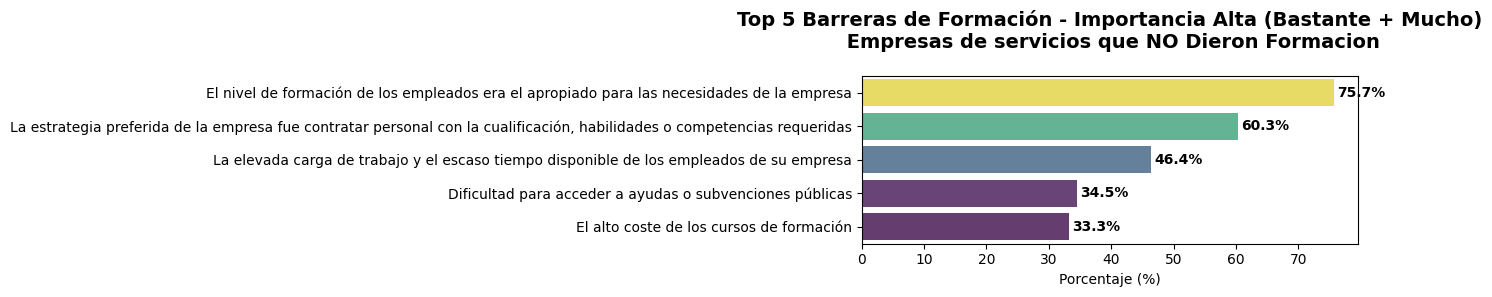

In [24]:
#Gráfico 1: Top 5 barreras con barras horizontales
plt.subplot(2, 1, 1)
#top_10_nf = barreras_ordenadas_nf.head(10).reset_index()
sns.barplot(data=top_5_nf, y='motivo', x='alta_importancia', hue='alta_importancia',legend=False, palette='viridis', alpha=0.8)
plt.title('Top 5 Barreras de Formación - Importancia Alta (Bastante + Mucho)\n Empresas de servicios que NO Dieron Formacion', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Porcentaje (%)')
plt.ylabel('')

# Agregar valores al final de cada barra
for i, v in enumerate(top_5_nf['alta_importancia']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')


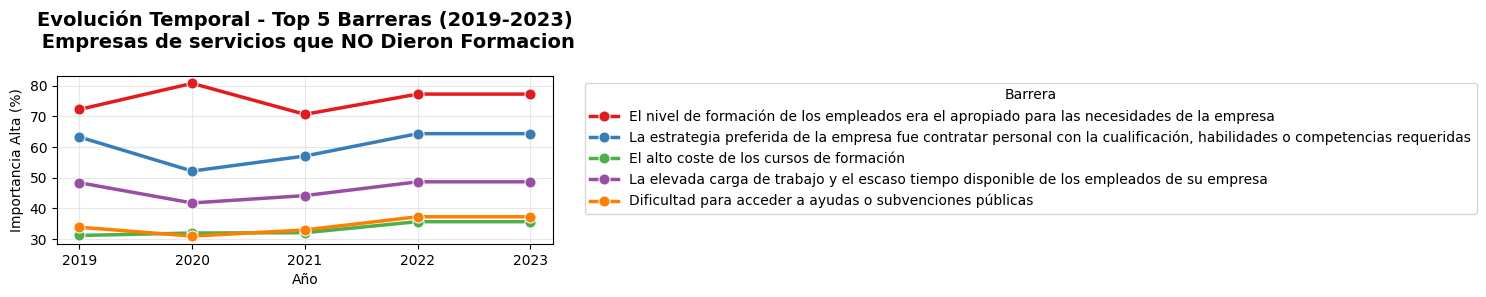

In [25]:
# Gráfico 2: Evolución temporal de top 5
plt.subplot(2, 1, 2)
# Preparar datos para seaborn
top_5_data_nf = noformacion_barreras[noformacion_barreras['motivo'].isin(top_5_motivos_nf[:5])]
sns.lineplot(data=top_5_data_nf, x='anio', y='alta_importancia', hue='motivo', 
             marker='o', linewidth=2.5, markersize=8, palette='Set1')
plt.title('Evolución Temporal - Top 5 Barreras (2019-2023)\n Empresas de servicios que NO Dieron Formacion', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Año')
plt.ylabel('Importancia Alta (%)')
plt.legend(title='Barrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(top_5_data_nf['anio'].unique())
plt.show()